<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 9 (midnight), 2023 -->

# Project 1 on Machine Learning, deadline October 9 (midnight), 2023
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, University of Oslo, Norway

Date: **September 3**

## Regression analysis and resampling methods

The main aim of this project is to study in more detail various
regression methods, including the Ordinary Least Squares (OLS) method.
In addition to the scientific part, in this course we want also to
give you an experience in writing scientific reports.  The format for
the delivery of your answers is namely that of a scientific report. At
for example
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/EvaluationGrading/EvaluationForm.md>
we detail how to write a report. Furthermore, at
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/ReportExample/>
you can find examples of previous reports. How to write reports will
also be discussed during the various lab sessions.

**A small recommendation when developing the codes here**. Instead of
jumping on to the two-dimensional function described below, we
recommend to do the code development and testing with a simpler
one-dimensional function, similar to those discussed in the exercises
of weeks 35 and 36. A simple test, as discussed during the lectures the first
two weeks is to set the design matrix equal to the identity
matrix. Then your model should give a mean square error which is exactly equal to zero.
When you are sure that your codes function well, you can then replace
the one-dimensional test function with the two-dimensional **Franke** function
discussed here.

The Franke function serves as a stepping stone towards the analysis of
real topographic data. The latter is the last part of this project.

### Description of two-dimensional function

We will first study how to fit polynomials to a specific
two-dimensional function called [Franke's
function](http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf).  This
is a function which has been widely used when testing various
interpolation and fitting algorithms. Furthermore, after having
established the model and the method, we will employ resamling
techniques such as cross-validation and/or bootstrap in order to perform a
proper assessment of our models. We will also study in detail the
so-called Bias-Variance trade off.

The Franke function, which is a weighted sum of four exponentials  reads as follows

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function will be defined for $x,y\in [0,1]$.  In a sense, our data are thus scaled to a particular domain for the input values.

Our first step will
be to perform an OLS regression analysis of this function, trying out
a polynomial fit with an $x$ and $y$ dependence of the form $[x, y,
x^2, y^2, xy, \dots]$. We will also include bootstrap first as a
resampling technique.  After that we will include the cross-validation
technique.

We can
use a uniform distribution to set up the arrays of values for $x$ and
$y$, or as in the example below just a set of fixed values for $x$ and
$y$ with a given step size.  We will fit a function (for example a
polynomial) of $x$ and $y$.  Thereafter we will repeat much of the
same procedure using the Ridge and Lasso regression methods,
introducing thus a dependence on the bias (penalty) $\lambda$.

Finally we are going to use (real) digital terrain data and try to
reproduce these data using the same methods. We will also try to go
beyond the second-order polynomials metioned above and explore 
which polynomial fits the data best.

The Python code for the Franke function is included here (it performs also a three-dimensional plot of it)

### Part e): Bias-variance trade-off and resampling techniques

Our aim here is to study the bias-variance trade-off by implementing the **bootstrap** resampling technique.
**We will only use the simpler ordinary least squares here**.

With a code which does OLS and includes resampling techniques, 
we will now discuss the bias-variance trade-off in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks and basically all Machine Learning algorithms. 

Before you perform an analysis of the bias-variance trade-off on your test data, make
first a figure similar to Fig. 2.11 of Hastie, Tibshirani, and
Friedman. Figure 2.11 of this reference displays only the test and training MSEs. The test MSE can be used to 
indicate possible regions of low/high bias and variance. You will most likely not get an
equally smooth curve!

With this result we move on to the bias-variance trade-off analysis.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

As in part d), we assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$.

The parameters $\boldsymbol{\beta}$ are in turn found by optimizing the mean
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite  this in terms of a term which contains the variance of the model itself (the so-called variance term), a
term which measures the deviation from the true data and the mean value of the model (the bias term) and finally the variance of the noise.
That is, show that

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=(\mathrm{Bias}[\tilde{y}])^2+\mathrm{var}[\tilde{f}]+\sigma^2,
$$

with

$$
(\mathrm{Bias}[\tilde{y}])^2=\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2,
$$

and

$$
\mathrm{var}[\tilde{f}]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

The answer to this exercise should be included in the theory part of the report.  This exercise is also part of the weekly exercises of week 37.
Explain what the terms mean and discuss their interpretations.

Perform then a bias-variance analysis of the Franke function by
studying the MSE value as function of the complexity of your model.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.
You can follow the code example in the jupyter-book at <https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#the-bias-variance-tradeoff>.

Shape: (8000, 1)
Polynomial degree: 0
Error: 0.07876309767292511
Bias^2: 0.0787506981485293
Var: 1.2399524395810506e-05
0.07876309767292511 >= 0.0787506981485293 + 1.2399524395810506e-05 = 0.07876309767292511
Shape: (8000, 3)
Polynomial degree: 1
Error: 0.023748241388546514
Bias^2: 0.02373894648706459
Var: 9.294901481921766e-06
0.023748241388546514 >= 0.02373894648706459 + 9.294901481921766e-06 = 0.02374824138854651
Shape: (8000, 6)
Polynomial degree: 2
Error: 0.01833178155197582
Bias^2: 0.01831996316578645
Var: 1.1818386189369806e-05
0.01833178155197582 >= 0.01831996316578645 + 1.1818386189369806e-05 = 0.018331781551975818
Shape: (8000, 10)
Polynomial degree: 3
Error: 0.00799585948504314
Bias^2: 0.00798545907025243
Var: 1.0400414790713221e-05
0.00799585948504314 >= 0.00798545907025243 + 1.0400414790713221e-05 = 0.007995859485043142
Shape: (8000, 15)
Polynomial degree: 4
Error: 0.00402885135379948
Bias^2: 0.004018757847490886
Var: 1.0093506308593131e-05
0.00402885135379948 >= 0.0040187

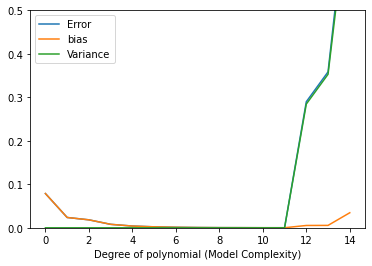

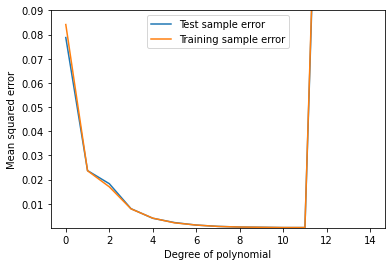

In [20]:
#Plots of bias-variance trade off and comparison of training vs test data error of franke function
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error

n_boostraps = 50
maxdegree = 15

# Generating the data set
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
x, y = np.meshgrid(x, y)
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2) ** 2) - 0.25 * ((9 * y - 2) ** 2))
    term2 = 0.75 * np.exp(-((9 * x + 1) ** 2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7) ** 2 / 4.0 - 0.25 * ((9 * y - 3) ** 2))
    term4 = -0.2 * np.exp(-(9 * x - 4) ** 2 - (9 * y - 7) ** 2)
    return term1 + term2 + term3 + term4

noise = 0.01 #Changed from zero as I got nan on statistics alot
z = FrankeFunction(x, y) + noise * np.random.randn(100) # the additional term is the noise. Adjust the factor by a small number (<<1)

# Making the data into lists
x_flat = x.flatten() 
y_flat = y.flatten() 
z_flat = z.flatten()    

#Function to create design matric (Code from: https://nucleartalent.github.io/MachineLearningECT/doc/ProjectsExercises/2020/hw3/html/hw3.html)
def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
    return X

#Creating empty datasets
error = np.zeros(maxdegree)
ztilde = np.zeros(maxdegree)
train_error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)


for degree in range(maxdegree):
    #Create design matrix
    X = create_X(x_flat, y_flat, n=degree)  
    #split data into training and test datasets for bootstrapping
    x_train, x_test, z_train, z_test = train_test_split(X, z_flat, test_size=0.2)
    ztilde = np.empty((x_train.shape[0], n_boostraps))
    zpredict = np.empty((z_test.shape[0], n_boostraps))
    #Fit model for n_bootstraps
    for k in range(n_boostraps):
        x_, y_ = resample(x_train, z_train)
        beta =  np.linalg.inv(x_.T @ x_) @ x_.T @ y_
        zpredict[:, k] = x_test @ beta
        ztilde[:,k] = x_train @ beta
    polydegree[degree] = degree
    z_test = np.reshape(z_test,(len(z_test),1))
    z_train = np.reshape(z_train,(len(z_train),1))
    #Take mean of n_bootstrapping results
    error[degree] = np.mean( np.mean((z_test - zpredict)**2, axis=1, keepdims=True) )
    train_error[degree] = np.mean( np.mean((z_train - ztilde)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (z_test - np.mean(zpredict, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(zpredict, axis=1, keepdims=True) )
    print('Shape:', x_train.shape)
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))
 

#Plot of bias-variance tradeoff 
plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.axis(ymin = 0, ymax = 0.5)
plt.xlabel('Degree of polynomial (Model Complexity)')
plt.legend()
plt.savefig('Bias_Var_Tradeoff.png', format='png')
plt.show()

#Plot of training vs test data error
plt.plot(polydegree, error, label='Test sample error')
plt.plot(polydegree, train_error, label='Training sample error')
plt.legend()
plt.axis(ymin = 0.00009, ymax = 0.09)
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean squared error')
plt.savefig('Train_vs_Test_data.png', format='png')
plt.show()

Shape: (800000, 1)
Polynomial degree: 0
Error: 22062.286064654432
Bias^2: 22062.25719019169
Var: 0.02887446274175099
22062.286064654432 >= 22062.25719019169 + 0.02887446274175099 = 22062.286064654432
Shape: (800000, 3)
Polynomial degree: 1
Error: 16494.52324764994
Bias^2: 16494.45504164793
Var: 0.06820600201315949
16494.52324764994 >= 16494.45504164793 + 0.06820600201315949 = 16494.52324764994
Shape: (800000, 6)
Polynomial degree: 2
Error: 12107.40753408002
Bias^2: 12107.306614224997
Var: 0.10091985501770194
12107.40753408002 >= 12107.306614224997 + 0.10091985501770194 = 12107.407534080015
Shape: (800000, 10)
Polynomial degree: 3
Error: 11578.748643803632
Bias^2: 11578.596186030896
Var: 0.15245777273351677
11578.748643803632 >= 11578.596186030896 + 0.15245777273351677 = 11578.74864380363
Shape: (800000, 15)
Polynomial degree: 4
Error: 9416.65315213319
Bias^2: 9416.440233340221
Var: 0.21291879296868793
9416.65315213319 >= 9416.440233340221 + 0.21291879296868793 = 9416.65315213319
Shape:

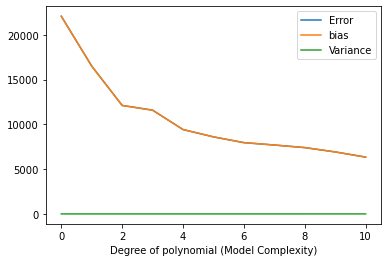

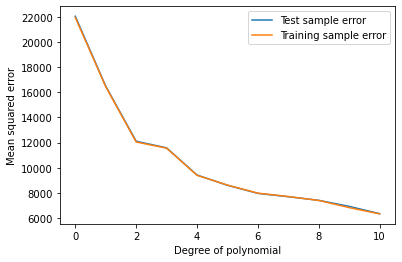

In [1]:
#Plots of Bias-variance trade off and comparison of training vs test data error of terrain data
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error

n_boostraps = 100
maxdegree = 15

# Load the terrain
terrain = imread('/home/Kristen/Documents/FYS4155/MachineLearning/doc/Projects/2023/Project1/DataFiles/SRTM_data_Norway_1.tif')
#terrain2 = imread('SRTM_data_Norway_2.tif')

N = 1000
terrain = terrain[:N,:N]
# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)

x_flat = x_mesh.flatten()
y_flat = y_mesh.flatten()
z = terrain
z_flat = z.flatten()

#Function to create design matric (Code from: https://nucleartalent.github.io/MachineLearningECT/doc/ProjectsExercises/2020/hw3/html/hw3.html)
def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
    return X

#Creating empty datasets
error = np.zeros(maxdegree)
ztilde = np.zeros(maxdegree)
train_error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)


for degree in range(maxdegree):
    #Create design matrix
    X = create_X(x_flat, y_flat, n=degree)  
    #split data into training and test datasets for bootstrapping
    x_train, x_test, z_train, z_test = train_test_split(X, z_flat, test_size=0.2)
    ztilde = np.empty((x_train.shape[0], n_boostraps))
    zpredict = np.empty((z_test.shape[0], n_boostraps))
    #Fit model for n_bootstraps
    for k in range(n_boostraps):
        x_, y_ = resample(x_train, z_train)
        beta =  np.linalg.inv(x_.T @ x_) @ x_.T @ y_
        zpredict[:, k] = x_test @ beta
        ztilde[:,k] = x_train @ beta
    polydegree[degree] = degree
    z_test = np.reshape(z_test,(len(z_test),1))
    z_train = np.reshape(z_train,(len(z_train),1))
    #Take mean of n_bootstrapping results
    error[degree] = np.mean( np.mean((z_test - zpredict)**2, axis=1, keepdims=True) )
    train_error[degree] = np.mean( np.mean((z_train - ztilde)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (z_test - np.mean(zpredict, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(zpredict, axis=1, keepdims=True) )
    print('Shape:', x_train.shape)
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))
 

#Plot of bias-variance tradeoff 
plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.xlabel('Degree of polynomial (Model Complexity)')
plt.legend()
plt.savefig('Bias_Var_Tradeoff_Terrain.png', format='png')
plt.show()

#Plot of training vs test data error
plt.plot(polydegree, error, label='Test sample error')
plt.plot(polydegree, train_error, label='Training sample error')
plt.legend()
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean squared error')
plt.savefig('Train_vs_Test_data_Terrain.png', format='png')
plt.show()

## Background literature

1. For a discussion and derivation of the variances and mean squared errors using linear regression, see the [Lecture notes on ridge regression by Wessel N. van Wieringen](https://arxiv.org/abs/1509.09169)

2. The textbook of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570), chapters 3 and 7 are the most relevant ones for the analysis here.

## Introduction to numerical projects

Here follows a brief recipe and recommendation on how to answer the various questions when preparing your answers. 

  * Give a short description of the nature of the problem and the eventual  numerical methods you have used.

  * Describe the algorithm you have used and/or developed. Here you may find it convenient to use pseudocoding. In many cases you can describe the algorithm in the program itself.

  * Include the source code of your program. Comment your program properly. You should have the code at your GitHub/GitLab link. You can also place the code in an appendix of your report.

  * If possible, try to find analytic solutions, or known limits in order to test your program when developing the code.

  * Include your results either in figure form or in a table. Remember to        label your results. All tables and figures should have relevant captions        and labels on the axes.

  * Try to evaluate the reliabilty and numerical stability/precision of your results. If possible, include a qualitative and/or quantitative discussion of the numerical stability, eventual loss of precision etc.

  * Try to give an interpretation of you results in your answers to  the problems.

  * Critique: if possible include your comments and reflections about the  exercise, whether you felt you learnt something, ideas for improvements and  other thoughts you've made when solving the exercise. We wish to keep this course at the interactive level and your comments can help us improve it.

  * Try to establish a practice where you log your work at the  computerlab. You may find such a logbook very handy at later stages in your work, especially when you don't properly remember  what a previous test version  of your program did. Here you could also record  the time spent on solving the exercise, various algorithms you may have tested or other topics which you feel worthy of mentioning.

## Format for electronic delivery of report and programs

The preferred format for the report is a PDF file. You can also use DOC or postscript formats or as an ipython notebook file.  As programming language we prefer that you choose between C/C++, Fortran2008, Julia or Python. The following prescription should be followed when preparing the report:

  * Use Canvas to hand in your projects, log in  at  <https://www.uio.no/english/services/it/education/canvas/> with your normal UiO username and password.

  * Upload **only** the report file or the link to your GitHub/GitLab or similar typo of  repos!  For the source code file(s) you have developed please provide us with your link to your GitHub/GitLab or similar  domain.  The report file should include all of your discussions and a list of the codes you have developed.  Do not include library files which are available at the course homepage, unless you have made specific changes to them.

  * In your GitHub/GitLab or similar repository, please include a folder which contains selected results. These can be in the form of output from your code for a selected set of runs and input parameters.

Finally, 
we encourage you to collaborate. Optimal working groups consist of 
2-3 students. You can then hand in a common report.

## Software and needed installations

If you have Python installed (we recommend Python3) and you feel pretty familiar with installing different packages, 
we recommend that you install the following Python packages via **pip** as
1. pip install numpy scipy matplotlib ipython scikit-learn tensorflow sympy pandas pillow

For Python3, replace **pip** with **pip3**.

See below for a discussion of **tensorflow** and **scikit-learn**. 

For OSX users we recommend also, after having installed Xcode, to install **brew**. Brew allows 
for a seamless installation of additional software via for example
1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution
you can use **pip** as well and simply install Python as 
1. sudo apt-get install python3  (or python for python2.7)

etc etc. 

If you don't want to install various Python packages with their dependencies separately, we recommend two widely used distrubutions which set up  all relevant dependencies for Python, namely
1. [Anaconda](https://docs.anaconda.com/) Anaconda is an open source distribution of the Python and R programming languages for large-scale data processing, predictive analytics, and scientific computing, that aims to simplify package management and deployment. Package versions are managed by the package management system **conda**

2. [Enthought canopy](https://www.enthought.com/product/canopy/)  is a Python distribution for scientific and analytic computing distribution and analysis environment, available for free and under a commercial license.

Popular software packages written in Python for ML are

* [Scikit-learn](http://scikit-learn.org/stable/), 

* [Tensorflow](https://www.tensorflow.org/),

* [PyTorch](http://pytorch.org/) and 

* [Keras](https://keras.io/).

These are all freely available at their respective GitHub sites. They 
encompass communities of developers in the thousands or more. And the number
of code developers and contributors keeps increasing.